# Descripción del problema

La contratación de personal puede ser una tarea muy complicada y tardía, esto porque dependiendo del puesto, se necesitan candidatos que tengan que cumplir con ciertas capacidades y cubrir unas otras habilidades. Encontrar al candidato ideal puede demorar mucho tiempo, algunos estudios arrojan que esta tarea puede durar hasta 52 días.

A continuación, se enlistan algunos puntos que se tienen que tomar en consideración respecto a la contratación de nuevos empleados.

* Contratar y retener a empleados son tareas extremadamente complejas dentro de las organizaciones que requieren capital, tiempo y habilidades.
* Los jefes de departamento de Recursos Humanos dedican aproximadamente un 40% de su jornada laboral a tareas que son relacionadas a la contratación y renuncia de empleados, tareas que, por lo general no aportan ingresos a la organización.
* Las empresas pueden llegar a gastar entre el 15% al 20% del salario del empleado para contratar a un nuevo candidato.
* Según el giro de la organización, en ciertos puesto de trabajo, la empresa tiene que invertir en equipo para que el nuevo empleado pueda laborar, poniendo como ejemplo, equipo de protección personal, y cuando un empleado decide dejar el puesto, existe la posibilidad de que este no devuelva el equipo, por lo que se traduce directamente en una inversión no retornable para la empresa.

Se ha generado una base de datos con información respecto a las renuncias que se han presentado en una empresa. Con el objetivo de atacar el problema de la deserción de personal, se prosigue a realizar un análisis con el objetivo de predecir cuales empleados son propensos a que renuncien a su puesto.

Una señal a tiempo puede ser importante para que la empresa genere soluciones para retener al empleado y evitar contratar a uno nuevo.

Dentro del conjunto de datos proporcionados por el departamento se encuentra información relacionada con los siguientes rubros:
* Participación laboral
* Educación
* Satisfacción laboral
* Clasificación de rendimiento
* Satisfacción en las relaciones
* Equilibrio Trabajo-Vida

Los datos que se usarán para el análisis son Open Database disponibles en: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).


# Importando Librerías y los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# Importando los datos
employee_df = pd.read_csv('./Human_Resources.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [31]:
# Nombre de las columnas
columns = employee_df.columns

Obtención de más información a algunas columnas que son difíciles de entender. (Esta información es proporcionada por el creador del conjunto de datos).

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

Estamos frente a un conjunto de datos con 1470 muestras y 35 variables o características.

In [4]:
employee_df.shape

(1470, 35)

Comprendiendo el conjunto de datos. Nombre de columna, valores nulos y tipo de datos para cada columna.

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Alguna información estadística para columnas numéricas

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Antes de aplicar un modelo de Machine Learning es importante convertir las variables categóricas en numéricas. Se tomarán las columnas de tipo de datos de objeto más importantes y se convertirán en variables dummies.

In [7]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

Comprobando si los cambios se han aplicado correctamente.

In [8]:
employee_df[['Attrition', 'Over18', 'OverTime']].head()

,Attrition,Over18,OverTime
0,1,1,1
1,0,1,0
2,1,1,1
3,0,1,1
4,0,1,0


# Análisis Exploratorio de datos

### Valores Nulos

Verifiquemos si hay datos nulos en el conjunto de datos.

Se utilizará la herramienta seaborn para imprimir un mapa de calor binario.

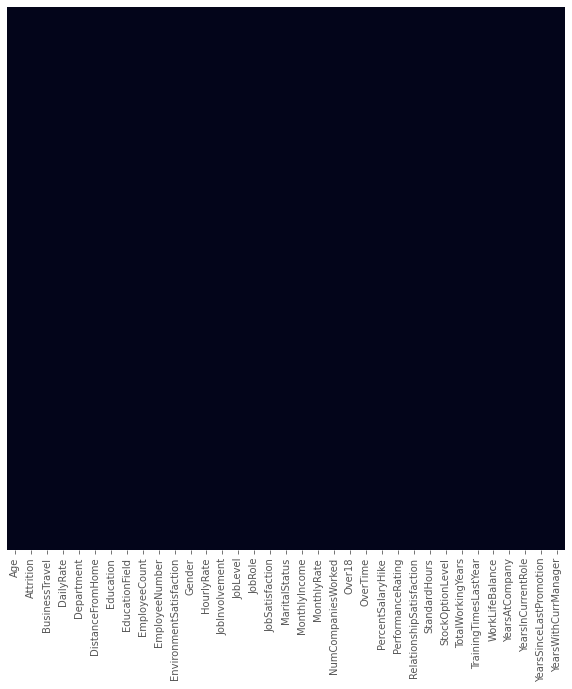

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False)
plt.show()

Como muestra el gráfico, no hay ningún valor nulo en el conjunto de datos.

### Distribución de las variables

Una excelente manera de entender una variable es con su histograma. En la siguiente línea de código se imprimirá.

<Figure size 432x288 with 0 Axes>

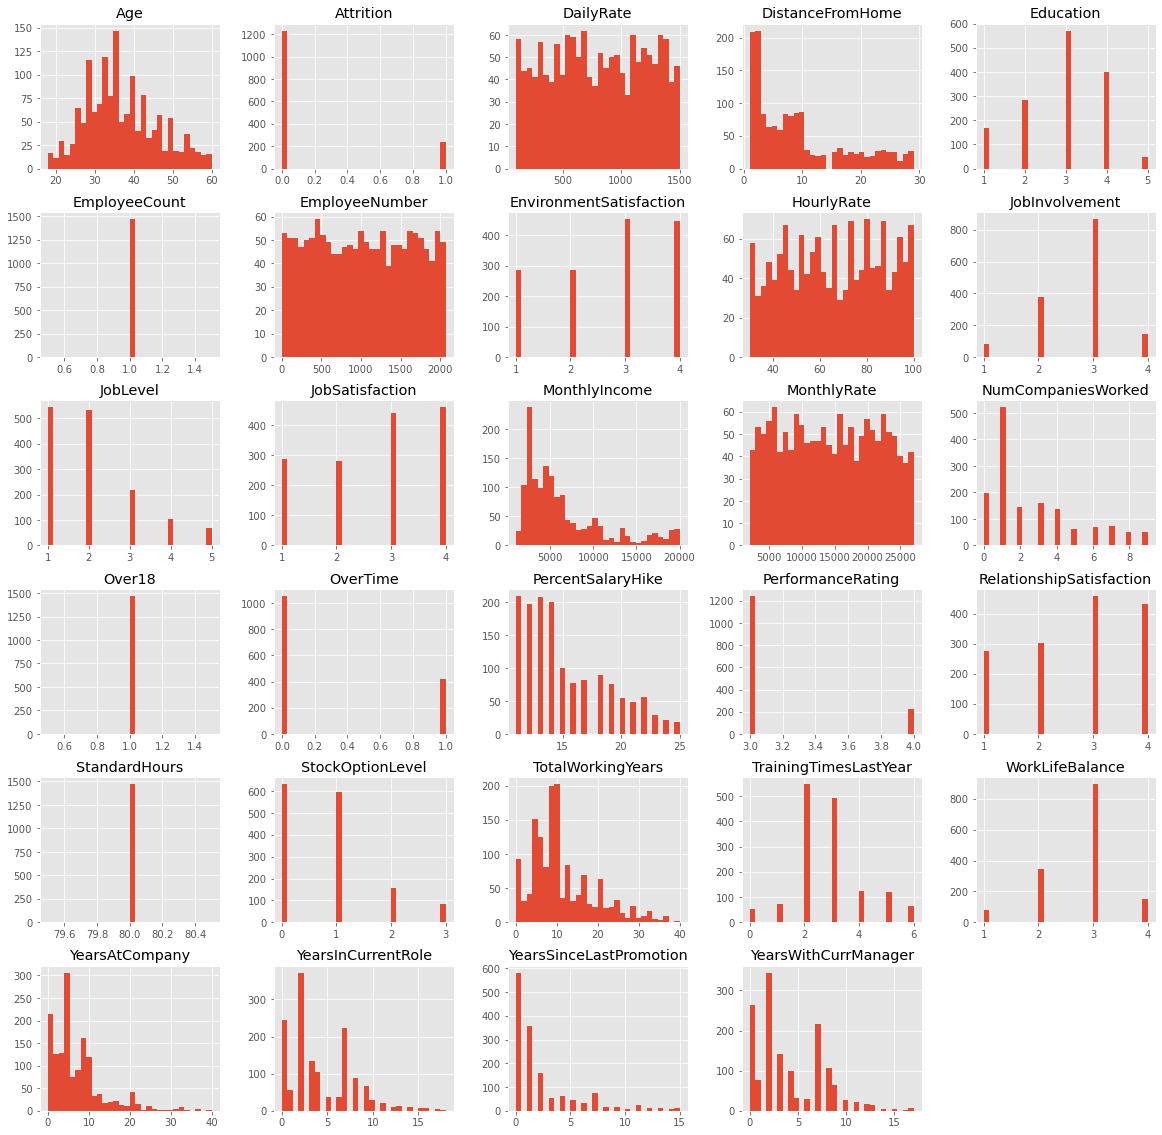

In [10]:
plt.figure()
employee_df.hist(bins = 30, figsize=(20,20))
plt.show()

Se puede llegar a una conclusión importante con los resultados anteriores. Por ejemplo, aproximadamente el 80% de los empleados están considerando no dejar la empresa, el otro 20% ha dejado la empresa.

Ahora, el objetivo del análisis es entender las características de ese 20%.

### Empleados que se van de la empresa vs los que se quedan.

Eliminando variables que no aportan mucho al problema que se analiza.

In [11]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'],
                 axis=1, inplace=True)

Dividiendo el conjunto de datos en los empleados que dejaron la empresa y por otro lado con los empleados que se quedan en la empresa.

In [12]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [13]:
total_employees = employee_df.shape[0]
total_left = left_df.shape[0]
total_stayed = stayed_df.shape[0]

per_left = round((total_left / total_employees) * 100, 2)
per_estayed = round((total_stayed / total_employees) * 100, 2)

print('Empleados totales: {}, Empleados que se van: {}, Empleados que se quedan: {}'.format(total_employees,
                                                                               total_left,
                                                                               total_stayed))
print('Porcentaje que se va: {}%, Porcentaje que se queda: {}%'.format(per_left, per_estayed))

Empleados totales: 1470, Empleados que se van: 237, Empleados que se quedan: 1233
Porcentaje que se va: 16.12%, Porcentaje que se queda: 83.88%


In [14]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Haciendo un análisis de ambos conjuntos de datos para llegar a alguna conclusión de los datos:

* Se compara la media y el error estándar de los empleados que se quedaron y se fueron.
* 'age': La edad promedio de los empleados que se quedaron es mayor en comparación con los que se fueron.
* 'DailyRate': La tarifa diaria de los empleados que se quedaron es más alta.
* 'DistanceFromHome': los empleados que permanecen viven más cerca del trabajo.
* 'Satisfacción ambiental' y 'Satisfacción laboral': los empleados que se quedan generalmente están más satisfechos con sus trabajos.
* 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de opciones sobre acciones.
* 'Ingreso Mensual': Los empleados que se quedan tienen un Ingreso mensual más alto.

### Matriz de Confusión

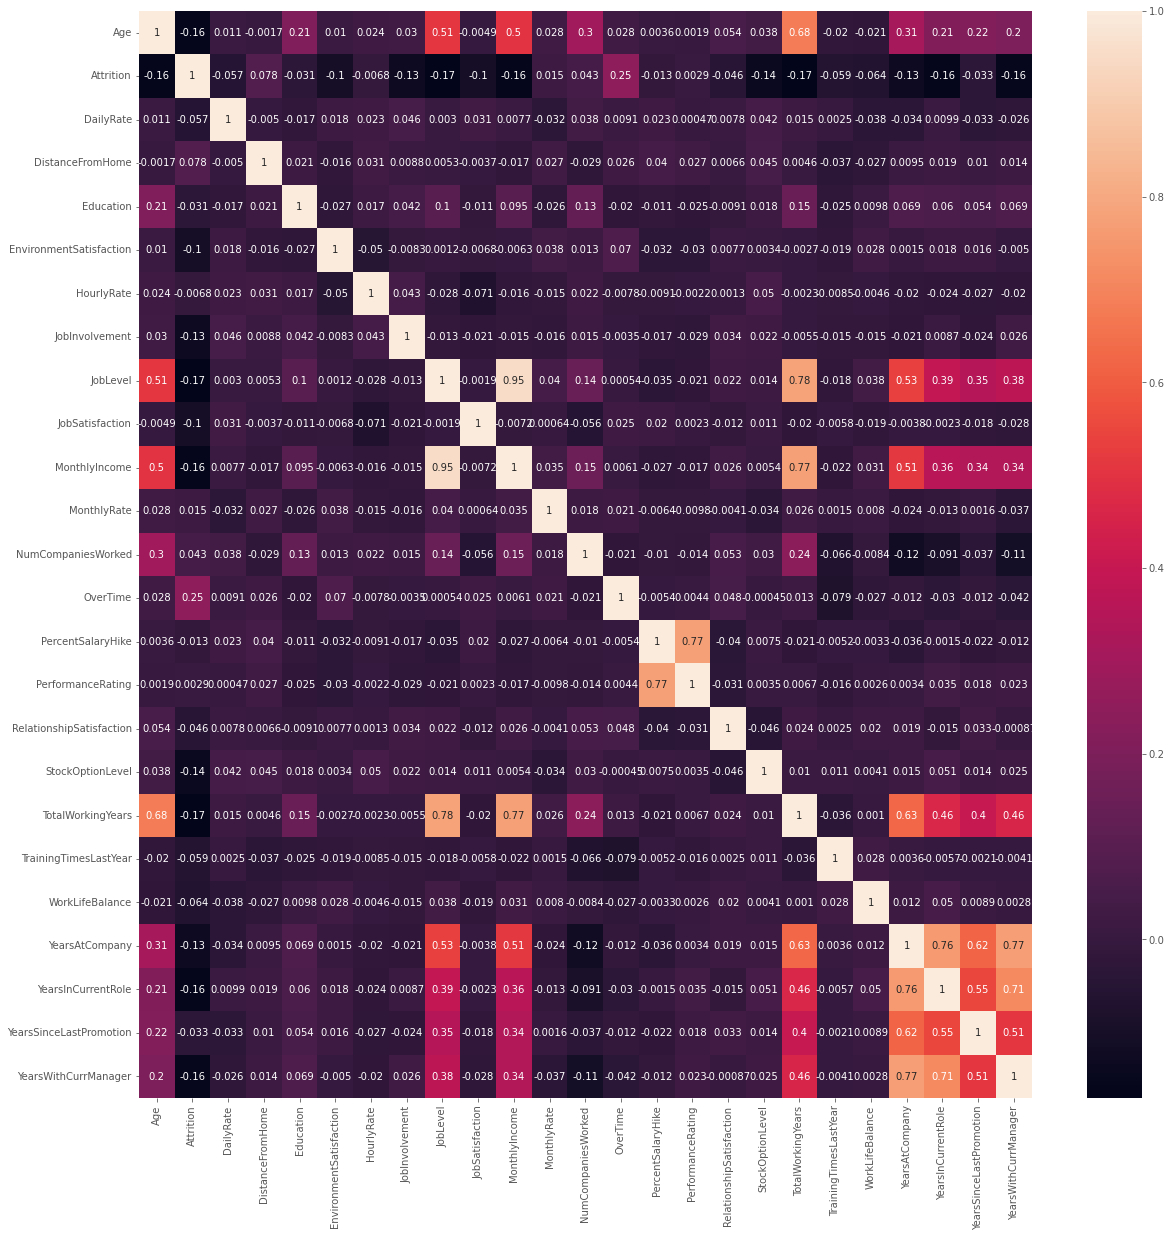

In [16]:
correlations = employee_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True)
plt.show()

Conclusiones:

* El nivel de trabajo está altamente correlacionado con el número total de horas de trabajo.
* El ingreso mensual está altamente correlacionado con el nivel de trabajo.
* El ingreso mensual está altamente correlacionado con el número total de horas de trabajo.
* La edad está altamente correlacionada con los ingresos mensuales.

### Distribución

#### Age vs Attrition

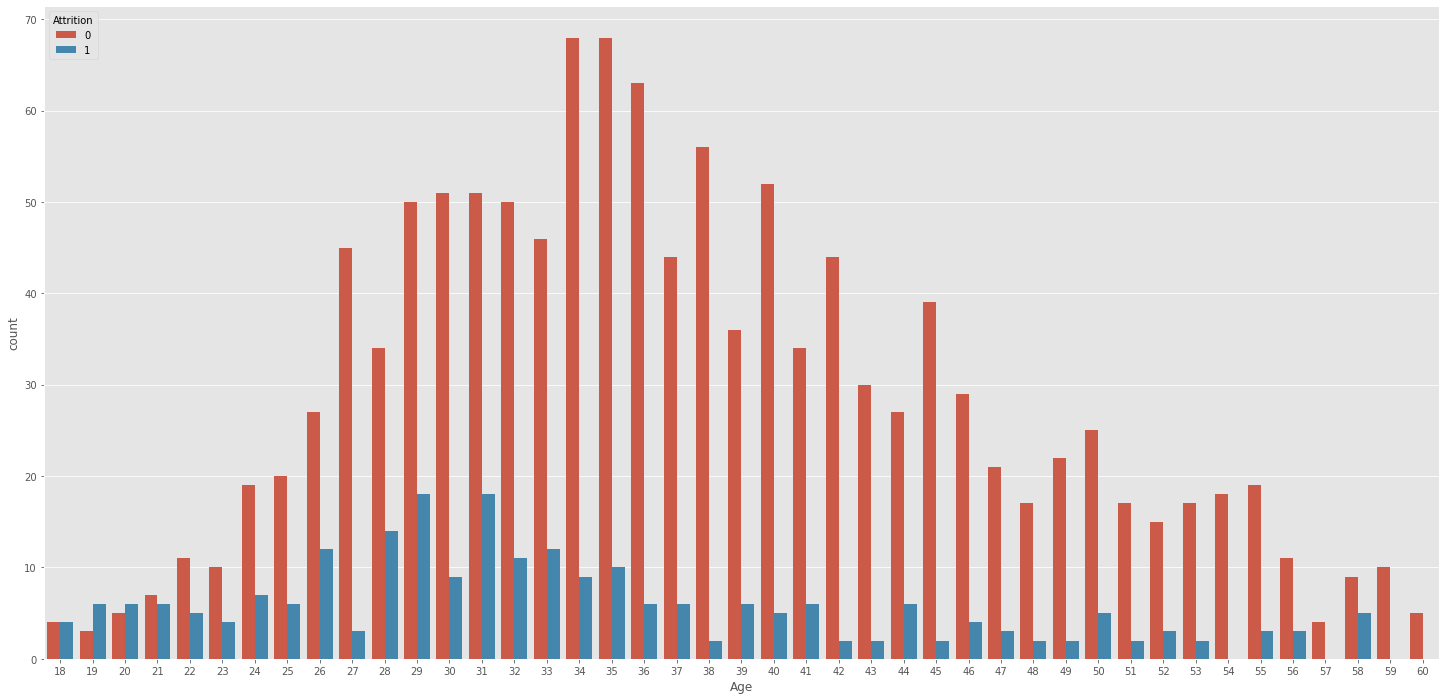

In [17]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)
plt.show()

La mayoría de los empleados que dejan la empresa tienen entre 18 y 37 años. Una vez que un empleado tiene más de esa edad, la probabilidad de dejar la empresa disminuye.

Un factor como la edad puede ser importante para determinar si un empleado dejará o no la empresa.

#### Job Role, Marital Status, Job Involvement y Job Level.

Se podrían analizar más variables para comprender la distribución de datos.

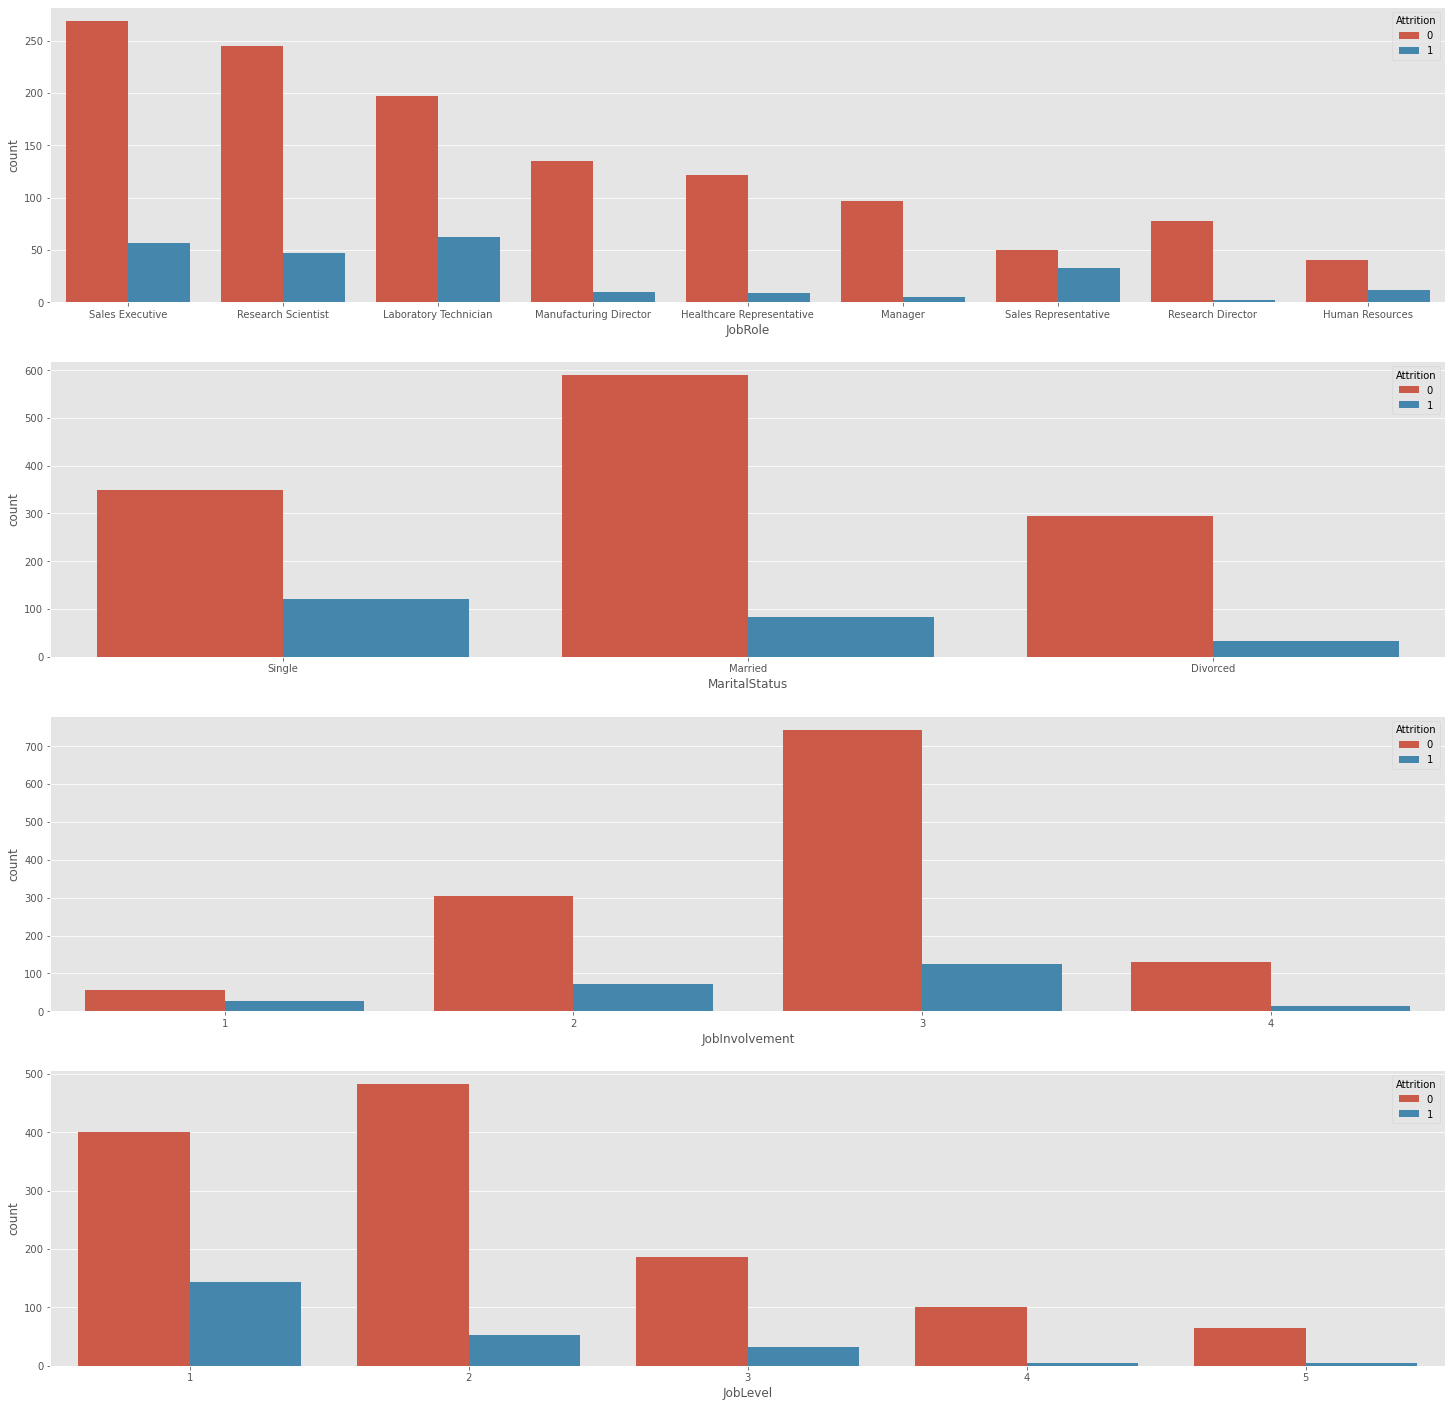

In [18]:
plt.figure(figsize=(25,25))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)
plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.show()

Conclusiones:
* En el departamento de ventas existe un alto porcentaje de empleados que dejan la empresa, aproximadamente el 40%
* Los empleados Solteros tienen más probabilidades de dejar la empresa que los demás.
* Cuanto menor sea la implicación en el trabajo es más probable que un empleado se vaya.
* Un empleado con más nivel en el trabajo tiene menos posibilidades de abandonar la empresa.

### Distribuciones de Densidad

#### Distance from Home

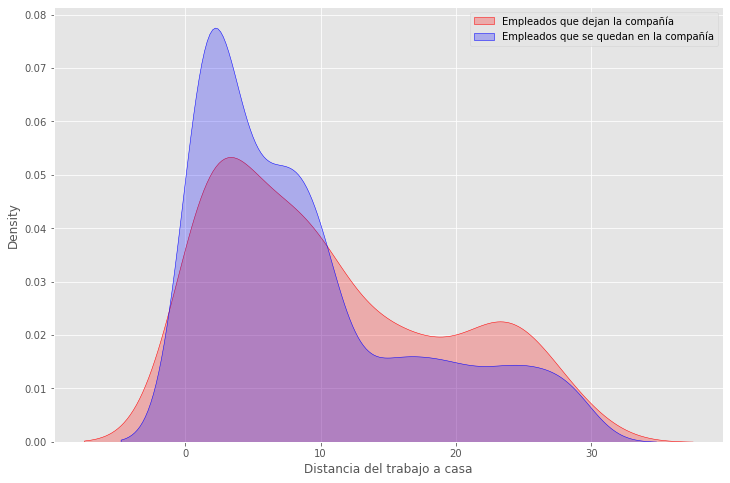

In [19]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Empleados que dejan la compañía',
            shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Empleados que se quedan en la compañía',
            shade=True, color='b')
plt.xlabel('Distancia del trabajo a casa')
plt.legend()
plt.show()

Por un lado, si la distancia es corta, la probabilidad de quedarse es mayor, por otro lado, si la distancia aumenta, más de 10 Millas, la probabilidad de irse es mayor.

#### Years with current manager

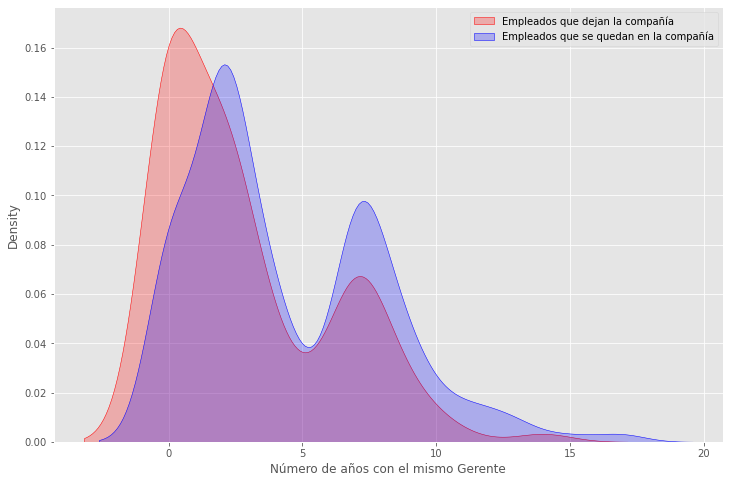

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Empleados que dejan la compañía',
            shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Empleados que se quedan en la compañía',
            shade=True, color='b')
plt.xlabel('Número de años con el mismo Gerente')
plt.legend()
plt.show()

Una vez que un empleado permanece aproximadamente 1,5 años con el mismo gerente, es más probable que permanezca en la empresa.

#### Total working years

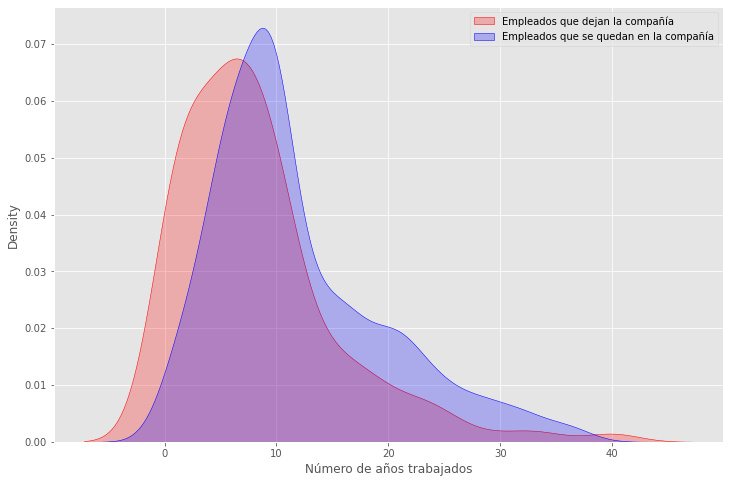

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Empleados que dejan la compañía',
            shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Empleados que se quedan en la compañía',
            shade=True, color='b')
plt.xlabel('Número de años trabajados')
plt.legend()
plt.show()

Como el tiempo de permanencia en la empresa es mayor, la probabilidad de permanencia también es alta.

### Box Plots

#### Gender vs Monthly Income

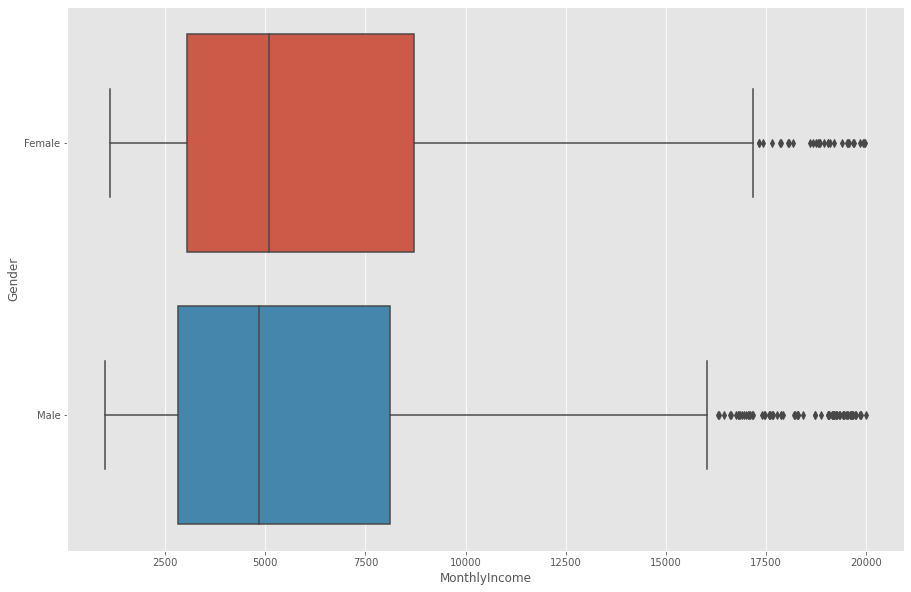

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)
plt.show()

No existe discriminación por el género del empleado, en el gráfico se puede ilustrar que el salario medio por género es casi el mismo, de hecho, el salario medio de las mujeres es un poco más alto que el de los hombres.

#### Monthly Income vs Job Role

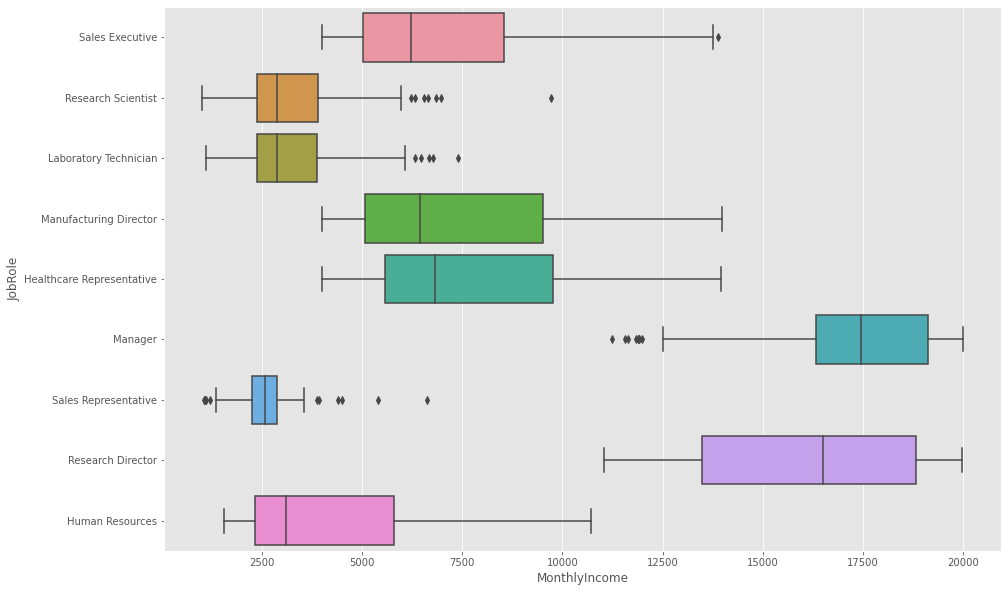

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)
plt.show()

En el gráfico anterior hay más información interesante:
* Los empleados con mayor salario son los gerentes o directores de investigación.
* El representante de ventas, el científico investigador y el técnico de laboratorio son los peor pagados.

### Trabajando con las variables categóricas

In [24]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
x_cat = employee_df[cat_cols]

In [25]:
x_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [28]:
x_cat.shape

(1470, 26)

In [29]:
x_cat = pd.DataFrame(x_cat)
x_cat.head() 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Trabajando con variables numéricas

In [32]:
num_cols = [col for col in columns if col not in cat_cols if col != 'Attrition']
x_num = employee_df[num_cols]

In [33]:
x_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


### Uniendo las variables en un solo dataset

In [34]:
x_all = pd.concat([x_cat, x_num], axis=1)
x_all.head()

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


### Min-Max Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_all)
x_scaled

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

### Variable Predictora

In [39]:
y = employee_df['Attrition']

# Entrenamiento y Evaluación del modelo

## Logistic Regression

Dividir los datos entre el conjunto de entrenamiento y el conjunto de prueba

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

In [45]:
x_train.shape

(1102, 50)

In [46]:
x_test.shape

(368, 50)

Entrenando el modelo

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Evaluando el modelo

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print('Accuracy: {}'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 90.21739130434783


El modelo tiene un 0.902 de precisión, lo que significa que el modelo puede predecir correctamente sobre el 90.2% si un empleado ha dejado la empresa o se ha quedado.

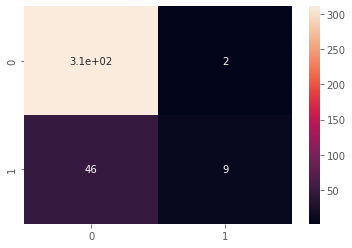

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.76      0.51      0.61        55

    accuracy                           0.90       368
   macro avg       0.84      0.74      0.78       368
weighted avg       0.89      0.90      0.89       368



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [55]:
print('Accuracy: {}'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 86.95652173913044


El algoritmo de bosque aleatorio es una buena opción, tenemos una precisión del 86.95%, un poco más baja que la regresión logística.

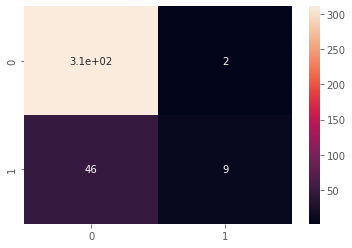

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       313
           1       0.82      0.16      0.27        55

    accuracy                           0.87       368
   macro avg       0.84      0.58      0.60       368
weighted avg       0.86      0.87      0.83       368



## Deep Learning

In [61]:
import tensorflow as tf 

Entrenando el modelo.

In [65]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=64, verbose=2)

Epoch 1/30
18/18 - 2s - loss: 0.4394 - accuracy: 0.8330
Epoch 2/30
18/18 - 0s - loss: 0.3504 - accuracy: 0.8621
Epoch 3/30
18/18 - 0s - loss: 0.3037 - accuracy: 0.8866
Epoch 4/30
18/18 - 0s - loss: 0.2744 - accuracy: 0.8920
Epoch 5/30
18/18 - 0s - loss: 0.2443 - accuracy: 0.9047
Epoch 6/30
18/18 - 0s - loss: 0.2153 - accuracy: 0.9192
Epoch 7/30
18/18 - 0s - loss: 0.1697 - accuracy: 0.9392
Epoch 8/30
18/18 - 0s - loss: 0.1379 - accuracy: 0.9546
Epoch 9/30
18/18 - 0s - loss: 0.1276 - accuracy: 0.9564
Epoch 10/30
18/18 - 0s - loss: 0.0776 - accuracy: 0.9728
Epoch 11/30
18/18 - 0s - loss: 0.0539 - accuracy: 0.9855
Epoch 12/30
18/18 - 0s - loss: 0.0482 - accuracy: 0.9828
Epoch 13/30
18/18 - 0s - loss: 0.0689 - accuracy: 0.9737
Epoch 14/30
18/18 - 0s - loss: 0.0317 - accuracy: 0.9873
Epoch 15/30
18/18 - 0s - loss: 0.0443 - accuracy: 0.9846
Epoch 16/30
18/18 - 0s - loss: 0.0367 - accuracy: 0.9873
Epoch 17/30
18/18 - 0s - loss: 0.0299 - accuracy: 0.9882
Epoch 18/30
18/18 - 0s - loss: 0.0151 - 

Entendiendo la perdida y el accuracy en cada epoch del algoritmo.

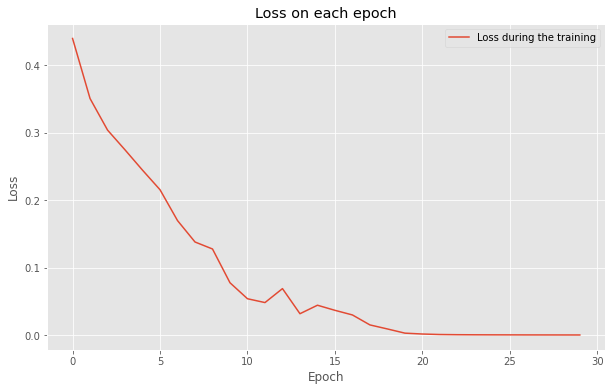

In [66]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.title('Loss on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss during the training'])
plt.show()

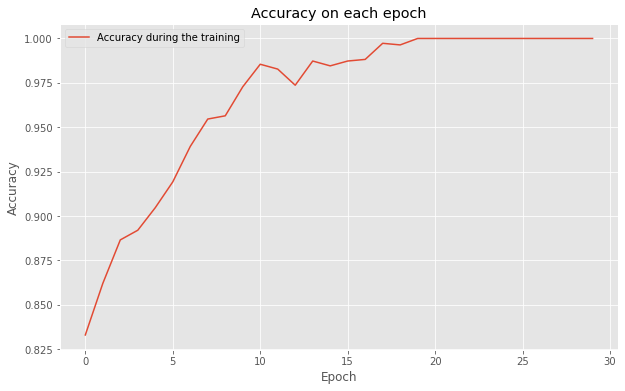

In [67]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'])
plt.title('Accuracy on each epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy during the training'])
plt.show()

La pérdida es de 0 aproximadamente en las 25 épocas y así sucesivamente, al mismo tiempo, la precisión es del 100%. No es exactamente un buen modelo, tal vez, el modelo está sobreajustando los datos, para verificar esto, es necesario evaluar el modelo.

Evaluando el modelo

In [68]:
y_pred = model.predict(x_test)

Debido a que los resultados que está obteniendo de la red neuronal es una probabilidad, es importante transformar esas probabilidades en 0 o 1, para poder evaluar el modelo correctamente.

In [69]:
y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

In [70]:
print('Accuracy: {}'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 84.78260869565217


Como vemos tenemos un 84.78% de acierto cuando las predicciones se realizan con nuevos datos.

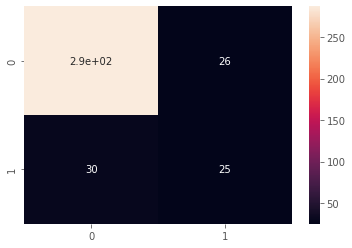

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       313
           1       0.49      0.45      0.47        55

    accuracy                           0.85       368
   macro avg       0.70      0.69      0.69       368
weighted avg       0.84      0.85      0.85       368



**Conclusiones**

* El mejor modelo es el de regresion logística, con un 90.2% de precisión al momento de evaluar los datos de testing.
* La red neuronal, al llegar a un número determinado de épocas, esta aprende los datos, al ser evaluada tenemos una baja precisión lo que significa que tenemos un algoritmo con overfitting.
* El modelo a implementar será el de regresión logística, esto para solucionar el problema. En un futuro, se puede mejorar la red neuronal para evitar el overfitting aplicando regularizaciones.